In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

In [7]:
from sklearn.datasets import load_iris
data=load_iris().data
target=load_iris().target
df_data=pd.DataFrame(data,columns=['sepal_length','sepal_width','petal_length','petal_width'])
df_target=pd.DataFrame(target,columns=['target'])
df_target=df_target['target'].astype(float)
iris=df_data.merge(df_target,left_index=True,right_index=True)
iris.head()
data

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [8]:
#coverting to numpy in order to do knn analysis via scikit learn
Y = iris[iris.columns.difference(['target'])]
X=iris['target']
Y=Y.to_numpy()
X=X.to_numpy()
X

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.])

In [9]:
#splitting train and test sets
X_train, X_test, y_train, y_test = train_test_split(Y, X, test_size=0.25)
X_train, X_test, y_train, y_test

(array([[4.9, 1.5, 6.3, 2.5],
        [4.7, 1.6, 6.3, 3.3],
        [4.9, 1.8, 6.1, 3. ],
        [4.7, 1.4, 6.1, 2.9],
        [4. , 1.2, 5.8, 2.6],
        [3.9, 1.2, 5.8, 2.7],
        [6.7, 2.2, 7.7, 3.8],
        [4. , 1.3, 6.1, 2.8],
        [1.4, 0.2, 5. , 3.3],
        [4.6, 1.3, 6.6, 2.9],
        [4. , 1.3, 5.5, 2.5],
        [6.4, 2. , 7.9, 3.8],
        [1.5, 0.2, 4.9, 3.1],
        [1.4, 0.2, 5.2, 3.4],
        [4.8, 1.8, 5.9, 3.2],
        [1.4, 0.2, 4.4, 2.9],
        [4. , 1.3, 5.5, 2.3],
        [3.9, 1.1, 5.6, 2.5],
        [1.7, 0.5, 5.1, 3.3],
        [5.6, 2.1, 6.4, 2.8],
        [1.3, 0.4, 5.4, 3.9],
        [1.5, 0.1, 5.2, 4.1],
        [4.2, 1.5, 5.9, 3. ],
        [1.5, 0.1, 4.9, 3.1],
        [4.8, 1.8, 6.2, 2.8],
        [4.9, 1.5, 6.9, 3.1],
        [4.1, 1. , 5.8, 2.7],
        [5.8, 1.6, 7.2, 3. ],
        [4.2, 1.2, 5.7, 3. ],
        [5.4, 2.3, 6.2, 3.4],
        [1.6, 0.2, 4.7, 3.2],
        [1.5, 0.4, 5.4, 3.4],
        [6.7, 2. , 7.7, 2.8],
        [4

In [10]:
#automating a process to see the accuracy of each trial of knn neighbors
from sklearn import metrics
neighbours=[1, 3, 5, 7, 10, 20, 30, 40, 50]
accuracylist=[]
for k in neighbours:
    X_train1, X_test1, y_train1, y_test1 = train_test_split(Y, X, test_size=0.25)
    X_train1, X_test1, y_train1, y_test1
    knn=KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred1 = knn.predict(X_test1)
    acc=metrics.accuracy_score(y_test1, y_pred1)
    if acc>0:
        accuracylist.append(acc)
    average=sum(accuracylist)/len(accuracylist)   
average

0.9385964912280702

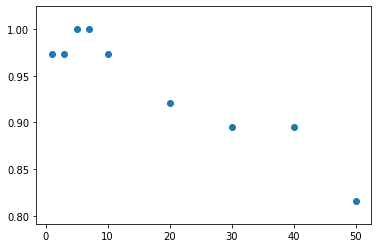

In [11]:
plt.scatter(neighbours,accuracylist)

As seen through this trial, we can see that with this particular set, the optimal value of n is 5 or 7 and as the n value increases greater than 7, the accuracy of the trial decreases.